In [1]:
# Common stuff reused by all applications
from analysis_common import *
%matplotlib inline


EXPERIMENT_SIZE_FIELDS = [
    "n_blocks_fit",
    "n_blocks_nn",
    "points_per_block",
]

PLATFORM_FIELDS = [
    "nodes",
    "cpus_per_node",
    "backends_per_node",
]

HANDPICKED_OUTLIERS = []

In [2]:
db = DataStorage("nn-split")
df = prepare_df(db, HANDPICKED_OUTLIERS)

df.query("start_ts > '2022-06-01'", inplace=True)

# Some bogus executions when testing copy stuff flags
df.query("(id < 24082000) or (id > 24083000)", inplace=True)

In [3]:
edf = df.explode("kneighbors_time").sort_values('mode')
edf['kneighbors_time'] = edf['kneighbors_time'].astype(float)
edf['fit_time'] = edf['fit_time'].astype(float)
edf['nodes'] = edf['nodes'].astype(int)

#edf

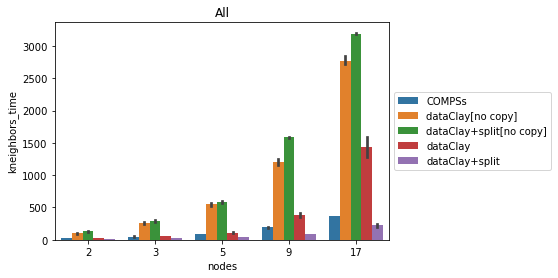

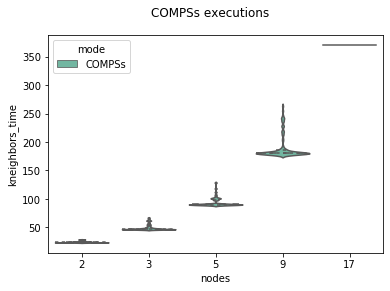

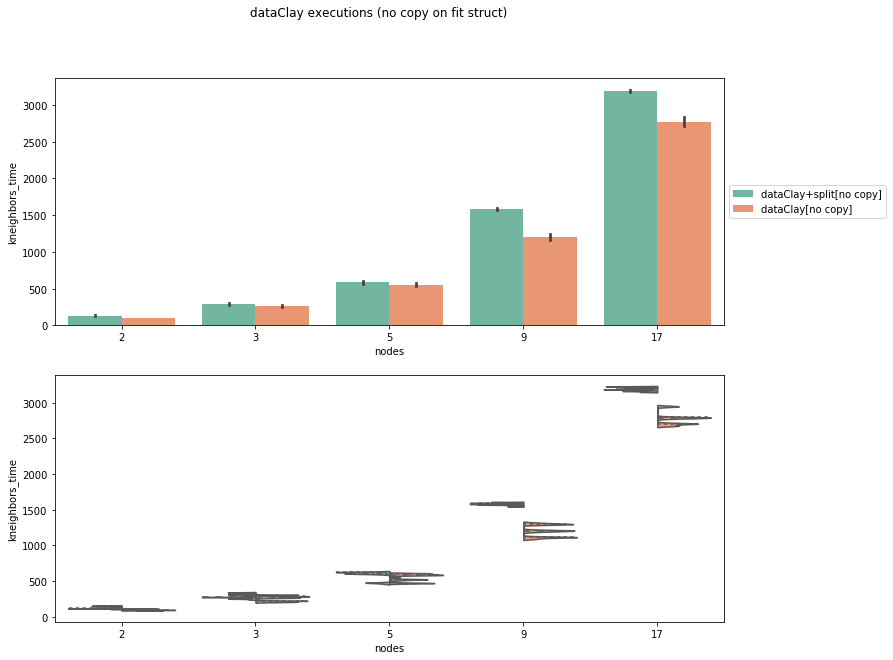

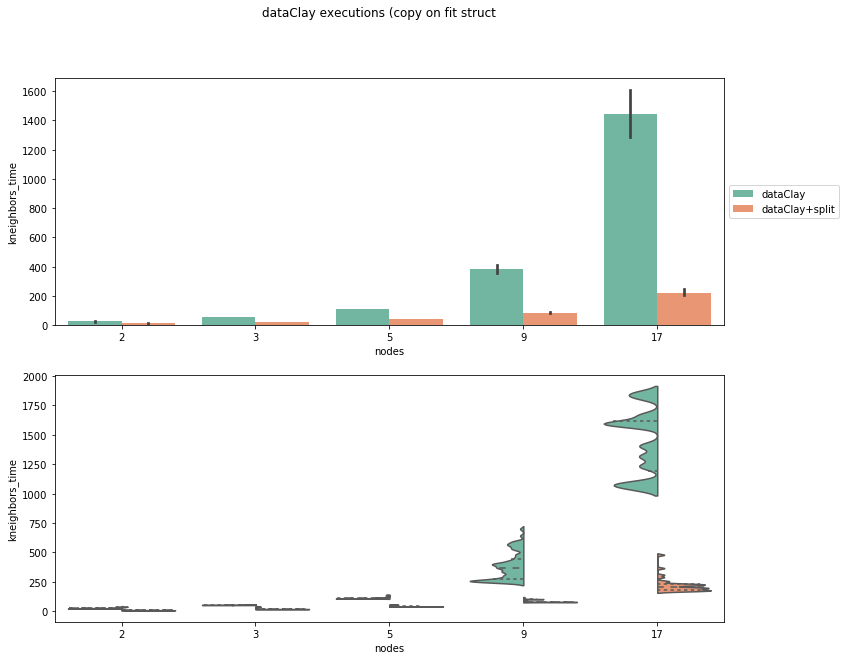

id  dataclay  use_split  \
nodes mode                                                         
2     COMPSs                   2.387992e+07       0.0        0.0   
      dataClay                 2.387555e+07       1.0        0.0   
      dataClay+split           2.387555e+07       1.0        1.0   
      dataClay+split[no copy]  2.408346e+07       1.0        1.0   
      dataClay[no copy]        2.408343e+07       1.0        0.0   
3     COMPSs                   2.387993e+07       0.0        0.0   
      dataClay                 2.387555e+07       1.0        0.0   
      dataClay+split           2.387556e+07       1.0        1.0   
      dataClay+split[no copy]  2.408344e+07       1.0        1.0   
      dataClay[no copy]        2.408344e+07       1.0        0.0   
5     COMPSs                   2.387994e+07       0.0        0.0   
      dataClay                 2.387556e+07       1.0        0.0   
      dataClay+split           2.387285e+07       1.0        1.0   
      dataClay+split[no copy]  2.408345e+07       1.0        1.0   
      dataClay[no copy]        2.408344e+07       1.0        0.0   
9     COMPSs                   2.388944e+07       0.0        0.0   
      dataClay                 2.389079e+07       1.0        0.0   
      dataClay+split           2.387984e+07       1.0        1.0   
      dataClay+split[no copy]  2.408348e+07       1.0        1.0   
      dataClay[no copy]        2.408348e+07       1.0        0.0   
17    COMPSs                   2.387324e+07       0.0        0.0   
      dataClay                 2.389443e+07       1.0        0.0   
      dataClay+split           2.387900e+07       1.0        1.0   
      dataClay+split[no copy]  2.408348e+07       1.0        1.0   
      dataClay[no copy]        2.408348e+07       1.0        0.0   

                               backends_per_node  cpus_per_node  \
nodes mode                                                        
2     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
3     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
5     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
9     COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   
17    COMPSs                                 2.0           48.0   
      dataClay                               2.0           48.0   
      dataClay+split                         2.0           48.0   
      dataClay+split[no copy]                2.0           48.0   
      dataClay[no copy]                      2.0           48.0   

                               computing_units  initialization_time  \
nodes mode                                                            
2     COMPSs                               1.0            13.449044   
      dataClay                             1.0            43.264362   
      dataClay+split                       1.0            43.112897   
      dataClay+split[no copy]          

In [4]:
data = edf.query('(nodes - 1) * 6 == n_blocks_fit')
kneighbors_data = data.copy()
kneighbors_data["nodes"] -= 1


hue_order=["COMPSs", "dataClay[no copy]", "dataClay+split[no copy]", "dataClay", "dataClay+split"]
plot_things(data, "kneighbors_time", hue_order=hue_order)

# sns.barplot(data=data, x="nodes", hue="mode", y="kneighbors_time")
# plt.title("6 blocks per node")
# plt.show()

# Toni way of seeing things:
# Put whole figure, divided by [normal /empty] and [optimized] (instead of `no copy`)
# Explain analysis with normal versions, see the problem, explain the problem, explain the solution
# (discuss why this does not affect COMPSs -> they do a copy blah blah)
# Say the "correct way" -> use a proper library / data structure
# Say what we do: minimal changes because we do not want to change the sklearn

data.groupby(["nodes", "mode"]).mean()

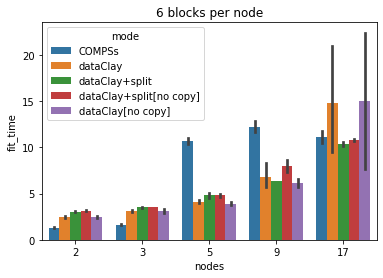

In [5]:
data = edf.query('(nodes - 1) * 6 == n_blocks_fit')
sns.barplot(data=data, x="nodes", hue="mode", y="fit_time")
plt.title("6 blocks per node")
plt.show()

Remember: when evaluating split overhead, the overhead is not only the split but also the added cost of fit.

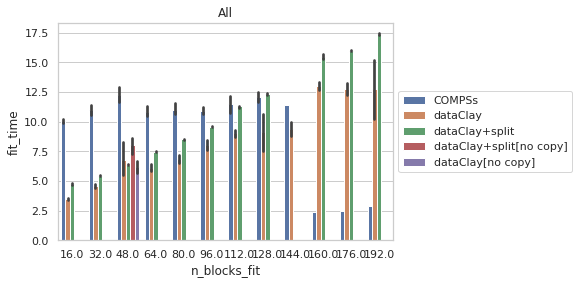

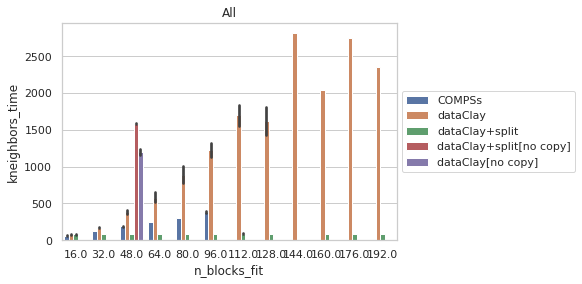

In [33]:
# Some random scalability whatevers, explain it better
data = edf.query("(nodes == 9)")

sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="fit_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
# TODO: Change granularity_index to: fragments per core [o algo així]
plt.show()

sns.barplot(data=data, x="n_blocks_fit", hue="mode", y="kneighbors_time")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.title("All")
# TODO: Change granularity_index to: fragments per core [o algo així]
plt.show()


In [34]:
mean_data = data.query("copy_fit_struct != 0").query("n_blocks_fit < 100").groupby(["n_blocks_fit", "mode"]).mean()

In [35]:
from math import log2

for (n_blocks_fit, mode), values in mean_data.iterrows():
    if mode == "COMPSs":
        mean_data.at[(n_blocks_fit, mode), "speedup"] = (n_blocks_fit) / values["kneighbors_time"]
    else:
        #mean_data.at[(n_blocks_fit, mode), "speedup"] = mean_data.at[(n_blocks_fit, "COMPSs"), "kneighbors_time"] / values["kneighbors_time"]
        mean_data.at[(n_blocks_fit, mode), "speedup"] = (n_blocks_fit) / values["kneighbors_time"]

In [36]:
mean_data

id  dataclay  use_split  nodes  \
n_blocks_fit mode                                                       
16.0         COMPSs          2.387327e+07       0.0        0.0    9.0   
             dataClay        2.388808e+07       1.0        0.0    9.0   
             dataClay+split  2.388904e+07       1.0        1.0    9.0   
32.0         COMPSs          2.385927e+07       0.0        0.0    9.0   
             dataClay        2.387377e+07       1.0        0.0    9.0   
             dataClay+split  2.387304e+07       1.0        1.0    9.0   
48.0         COMPSs          2.387857e+07       0.0        0.0    9.0   
             dataClay        2.389079e+07       1.0        0.0    9.0   
             dataClay+split  2.387984e+07       1.0        1.0    9.0   
64.0         COMPSs          2.385696e+07       0.0        0.0    9.0   
             dataClay        2.388529e+07       1.0        0.0    9.0   
             dataClay+split  2.388648e+07       1.0        1.0    9.0   
80.0         COMPSs          2.383568e+07       0.0        0.0    9.0   
             dataClay        2.388293e+07       1.0        0.0    9.0   
             dataClay+split  2.387528e+07       1.0        1.0    9.0   
96.0         COMPSs          2.380918e+07       0.0        0.0    9.0   
             dataClay        2.389094e+07       1.0        0.0    9.0   
             dataClay+split  2.383904e+07       1.0        1.0    9.0   

                             backends_per_node  cpus_per_node  \
n_blocks_fit mode                                               
16.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
32.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
48.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
64.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
80.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   
96.0         COMPSs                        2.0           48.0   
             dataClay                      2.0           48.0   
             dataClay+split                2.0           48.0   

                             computing_units  initialization_time   fit_time  \
n_blocks_fit mode                                                              
16.0         COMPSs                      1.0            15.191243   9.962896   
             dataClay                    1.0           143.950625   3.474194   
             dataClay+split              1.0           143.899073   4.749051   
32.0         COMPSs                      1.0            15.549903  10.999794   
             dataClay                    1.0           154.762705   4.569199   
             dataClay+split              1.0           153.669265   5.456986   
48.0         COMPSs                      1.0            16.266992  12.341675   
             dataClay                    1.0           165.632262   6.762820   
             dataClay+split              1.0           164.571125   6.366876   
64.0         COMPSs                      1.0            14.954920  10.721653   
             dataClay                    1.0           174.694398   6.111029   
             dataClay+split              1.0           175.134037   7.450566   
80.0         COMPSs                      1.0            14.849727  10.954114   
             dataClay                    1.0           185.314898   6.868180 

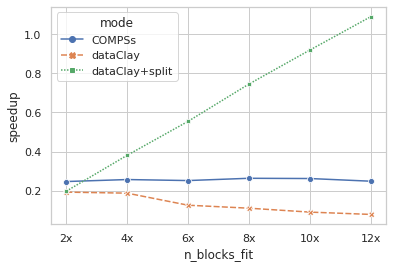

In [37]:
ax = sns.lineplot(data=mean_data, style="mode", markers=True, x="n_blocks_fit", hue="mode", y="speedup")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])
#ax.set(yscale='log')
plt.show()

# Figure generation

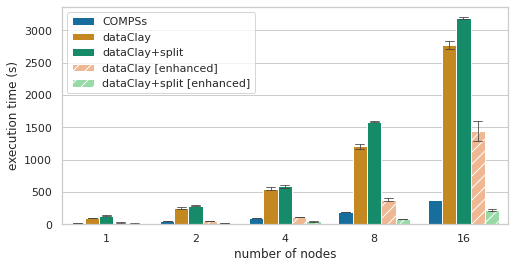

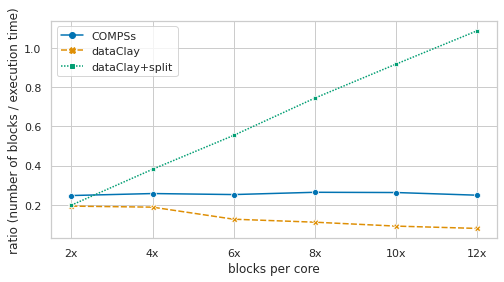

In [96]:
sns.set(style="whitegrid", color_codes=True)

hue_order=["COMPSs", "dataClay[no copy]", "dataClay+split[no copy]", "dataClay", "dataClay+split"]

ax = sns.barplot(y="kneighbors_time", x="nodes", hue="mode",
                 data=kneighbors_data,
                 capsize=0.1,
                 errwidth=0.8,
                 hue_order=hue_order,
                 palette=sns.color_palette("colorblind")[:3] + sns.color_palette("pastel")[1:3])

for i, bar in enumerate(ax.patches):
    if (i > 14):  # experimentally found the proper value == 14
        bar.set_hatch('//')

h, l = ax.get_legend_handles_labels()
ax.legend(h, ["COMPSs", "dataClay", "dataClay+split", "dataClay [enhanced]", "dataClay+split [enhanced]"])
ax.set_ylabel("execution time (s)")
ax.set_xlabel("number of nodes")

save_tweaks("kneighbors-weakscaling.pdf")
plt.show()

ax = sns.lineplot(data=mean_data, style="mode", 
                  markers=True, x="n_blocks_fit", 
                  hue="mode", y="speedup", 
                  palette="colorblind")

ax.legend().title = ""
ax.set_ylabel("ratio (number of blocks / execution time)")
ax.set_xlabel("blocks per core")
ax.set(xticks=[16, 32, 48, 64, 80, 96], xticklabels=["2x", "4x", "6x", "8x", "10x", "12x"])

save_tweaks("kneighbors-grow.pdf")
plt.show()
